In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from sklearn.decomposition import PCA
from astropy.table import Table, Column
import sys
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
import pandas as pd
sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os

sys.path.insert(0, '/home/reza/erq/')
# from erqml  import *
from sklearn.cluster import AgglomerativeClustering


In [6]:

# reading ...
smp=Table.read('../LumMatch/LumMatch.fits') 

iW3 = smp['i-w3']
# iW3 = 10.0**(iW3/2.5)
kt80 = smp['kurt80_gf']
rew = smp['rew_gf']
rew=np.log10(rew)
fwhm = smp['fwhm_gf'] 
fwhm=np.log10(fwhm)
N5_C4 = smp['frat_nv/civ']
rz=smp['r-z']
sdss_name=smp['sdss_name']
z_qso=smp['z_dr12']
X = np.array(list(zip(iW3, rew, rz)))
# iW3_sc, m, s = scale(iW3)
# rew_sc, m, s = scale(rew)
X_sc, minData, rangeData = erqScaling.MinMaxScaler(X)


X_tr = X_sc
ERQ_sc = X_tr[((iW3>4.6) & (rew>2))]
ERQ = X[((iW3>4.6) & (rew>2))]
link='average'
symbols = ['d', 'o', 's','x', 'v']
sizes=[10,1,7,7]
colors = plt.cm.viridis_r(X_sc[:,2])
# smp.columns
# print(len(colors))
# print(np.max(rz))/

4 average
100 [5.42596685 2.12062474 0.39207123]
30476 [2.48476654 1.55458042 0.24321709]
4 [ 3.45461776  1.47995997 -1.42159404]
4 [2.16697652 1.57048539 2.01201821]


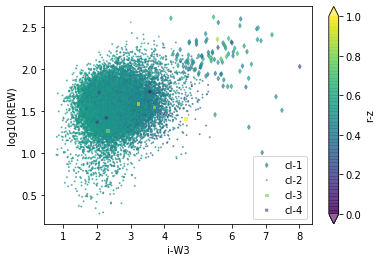

In [29]:
for ncl in range(4,5):
    print(ncl, link)
#     model = AgglomerativeClustering(n_clusters=ncl,
#                                         linkage=link, affinity='euclidean').fit(X_tr)
#     labels = model.labels_
    
    for i in range(ncl):
        X_plot = X[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[labels==i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
    plt.savefig('3d-rz-agg-l-%s-ncl-%d-cmp.pdf' %(link,ncl) , bbox_inches='tight', dpi=1200)
    plt.show()

In [34]:
np.max(z_qso)

3.4

In [ ]:
from sklearn import svm
%matplotlib
X_tr = X_sc
ERQ_sc = X_tr[((iW3>4.6) & (rew>2))]
ERQ = X[((iW3>4.6) & (rew>2))]
link='average'
for ncl in range(4,5):
        print(ncl, link)
        model = AgglomerativeClustering(n_clusters=ncl,
                                        linkage=link, affinity='euclidean').fit(X_tr)
        labels = model.labels_
#         for i in range(len(iW3)):
#                 if(labels[i]==1):
#                         if(rew[i]<2):
#                                 print(sdss_name[i])
#         h=0.01
#         x_min, x_max = X_tr[:, 0].min() - 1, X_tr[:, 0].max() + 1
#         y_min, y_max = X_tr[:, 1].min() - 1, X_tr[:, 1].max() + 1
#         x,y=np.linspace(x_min, x_max,500), np.linspace(y_min, y_max, 500)
#         xx, yy = np.meshgrid(x,y)
#         x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        # y0_min, y0_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        # x0,y0=np.linspace(x0_min, x0_max,500), np.linspace(y0_min, y0_max, 500)
        # xx0, yy0 = np.meshgrid(x0,y0)

        # for C in [0.5, 0.7, 1, 2, 5, 10] :    
        #         # for gamma in [0.1,  0.5, 0.7, 1, 1.5, 2]:
#         clf = svm.SVC(C=1, kernel='linear', gamma=1)
        #         clf = svm.SVC(C = C, kernel='linear', gamma=0.001)
#         clf.fit(X_tr, labels)
#         W = clf.coef_; I = clf.intercept_
        #         print(W)
        #         print(I)
        #         # a=[]; b=[]
                
        #         plt.clf()
                
        #         # plt.scatter(ERQ[:,0], ERQ[:,1], c='r')
        # plt.scatter(X[:,0], X[:,1], c=)
#         for l in [4, 0]:
#                 a=(-W[l,0]/W[l,1])
#                 b=(-I[l]/W[l,1])
#                 if(l==0): xxx=np.linspace(3,6.2365,10)
#                 if (l==4): xxx=np.linspace(6.2365, 8,10)
#                 x1, x2 = x_min, x_max
#                 y1, y2 = a*x1+b, a*x2+b
#                 a0 = s2/s1*a
#                 b0 = y1*s2+m2 - a0*(x1*s1+m1)
#                 # plt.plot(xxx, yyy, alpha=0.4,  linewidth=5, label='y=%.2fx+(%.2f)' %(a1,b1))
#                 plt.plot(xxx, a0*xxx +b0, alpha=0.4,  linewidth=2, label='y=%.3fx+(%.3f)' %(a0,b0))
#         plt.legend()
        # plt.show()
        # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Z = Z.reshape(xx.shape)
        # print(np.unique(Z))
        # plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
        colors = ['C0', 'C1', 'C2','C3', 'C4', 'C5', 'C6', 'C7', 'C8']
#         symbols = ['o', 'x', '1','d', 'v']
        # for i in range(ncl):
        #         k_med=[]
        #         for l in range(len(labels)):
        #                 if(labels[l]==i):
        #                         k_med.append(kt80[l])
        #         print(np.median(k_med))

        color_code=[]
#         symbol_code=[]
        for i in range(len(X_sc)):
                color_code.append(colors[labels[i]])
#                 symbol_code.append(symbols[labels[i]])
        fg = plt.figure()
        ax = Axes3D(fg)
        ax.scatter(X[:,0], X[:,1], X[:,2],  c=color_code, alpha=0.7, s=2)
#         plt.scatter(X[:,0], X[:,1],  marker=symbol, c=X[:,2])
#         plt.scatter(X_tr[:,0], X_tr[:,1],  c=color_code, alpha=0.7, s=5)
#         plt.scatter(X[:,0], X[:,1],  c=color_code, alpha=0.7, s=5)
        # plt.scatter(X_pca[indERQ,0], X_pca[indERQ,1], c = color_code[indERQ], s=7)
        # ax.scatter(ERQ[:,0], ERQ[:,1],  facecolor='none', s=10, edgecolors= 'black')
        # plt.scatter(ERQ[:,0], ERQ[:,1],  facecolor='none', s=10, edgecolors= 'black')
#         plt.xlabel('(i- W3-%.2f)/%.2f' %(m1, s1))
#         plt.ylabel('(log10(REW)-%.2f)/%.2f' %(m2,s2))
        plt.xlabel('i-W3')
        plt.ylabel('log10(REW)')
#         plt.axvline(x=4.6, ymin=0.7, ls='--', alpha=0.5, c='black')
#         plt.axhline(y=2, xmin=0.55, ls='--', alpha=0.5, c='black')
#         plt.title('2d,  linkage: %s, nCl: %d' %(link, ncl))
#         ax.set_title('3d,  linkage: %s, nCl: %d' %(link, ncl))
#         ax.set_zlabel('kt80')
        plt.savefig('agg-l-%s-ncl-%d.pdf' %(link,ncl) , bbox_inches='tight', dpi=1200)
#         plt.savefig('3d-agg-l-%s-ncl-%d-cmp.pdf' %(link,ncl) , bbox_inches='tight', dpi=1200)
        # plt.savefig('/home/reza/erq/paper/draft/fig/agg-ncl-%d.pdf' %ncl
                #     , bbox_inches='tight', dpi=1200)
        # plt.legend()
        plt.show()
        # plt.clf(); plt.cla(); plt.close()


        # blue_id=np.zeros([len(X)])
        # narrow_id=np.zeros([len(X)])
        # for i in range(len(X)):
        #         if(labels[i]==1):
        #                 if(iW3[i]<4.6):
        #                         blue_id[i]=1
        #                 if(rew[i]<2):
        #                         narrow_id[i]=1
                        
        # np.savetxt('narrow_id.txt', narrow_id)
        # np.savetxt('blue_id.txt', blue_id)
        # # plot_dendrogram(model)
        # print(np.unique(labels))
        # print(max(labels))


        # for i in range(len(labels)):
        #         if(labels[i]!=1):
        #                 labels[i]=0
        #         else:
        #                 labels[i]=1




        # w = clf.coef_[0]
        # a = -w[0] / w[1]
        # xx = np.linspace(3,5)
        # yy = a * xx - (clf.intercept_[0]) / w[1]

        # plt.plot(xx, yy, label='C=%f'%(C)) 
        # plt.savefig('2d-agg-ncl-%d-link-%s.pdf' %( ncl, link), dpi=1200, format='pdf', bbox_inches='tight')
        # ERQ = X[rew>2 & iW3>4.6]
        # C1=np.median(X, axis=0); C2=np.median(ERQ, axis=0)
        # plt.plot([C1[0],C2[0]], [C1[1], C2[1]])
        # print(np.rad2deg(np.arctan(erq_vec[1]/erq_vec[0])), np.rad2deg(np.arctan(a)))
        # plt.axis('equal')
        # plt.savefig('bd-ncl-%d.pdf' %( ncl))
        # plt.clf()
        # plt.show()
        # x_span = [min(X_tr[:,0]), max(X_tr[:,0])]
        # y_span = [min(X_tr[:,1]), max(X_tr[:,1])]
        # nGrid=100
        # xx, yy= np.meshgrid(np.linspace(x_span[0], x_span[1], nGrid), np.linspace(y_span[0],y_span[1], nGrid))
        # clf = svm.SVC(C=1000, kernel='linear')
        # clf = svm.SVR()
        # clf.fit(X_tr, labels)
        # # Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        # # plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred', label='rbf')

        # # plot the decision function
        # ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
# # plot support vectors
# # ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#         #    linewidth=1, facecolors='none', edgecolors='k')
# plt.show()
